In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as mnso
import pprint
# machine learning libraries
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Dataset

### Attributes

- Combustible consumido ((0,20)) litros
- Tipo de combustible (Gasolina,Diesel,Gas)
- Kilometraje (km)
- Emisión del tubo de escape (hardware) (1 al 10) malo -> bueno
- Marca Camión (4 marcas)
- Modelo (2 modelos por marca)
- Tipo Transmisión (manual, automática)
- Capacidad (Kg)

- fiat: 
1. ducato 900 kg
2. fiorino 650 kg

- volkswagen:
1. amarok 830 kg
2. caddy 800 kg

- renaut:
1. dacia dokker 1200 kg
2. kangoo 800 kg

- Mercedes:
1. vito: 1100 kg
2. sprinter 1000 kg

## Creating the dataset

In [2]:
# Filling the attributes column.
rows = 100
combustible_consumido = random.choices(list(np.random.rand(rows)*20), weights=None, k=rows)
tipo_combustible = random.choices(["gas", "diesel", "gasolina"], weights= [40,35,25], k=rows)
km = [random.uniform(100,2000) for x in range(rows)]
Emision_escape = random.choices([6,7,8,9], weights= [10,40,40,10], k=rows)
marca_camion = random.choices(["Volkswagen", "Fiat", "Renaut", "Mercedes"], weights = None, k=rows)
modelo = list(range(rows))
tipo_transm = random.choices(["manual", "automatica"], weights=[80,20], k=rows)
capacidad = list(range(rows)) 

In [3]:
df = pd.DataFrame({"combustible_consumido":combustible_consumido,
                   "tipo_combustible":tipo_combustible,
                   "km":km,
                   "emision_escape":Emision_escape,
                   "marca_camion":marca_camion,
                   "modelo":modelo,
                   "tipo_transm":tipo_transm,
                   "capacidad":capacidad})

In [4]:
df

,combustible_consumido,tipo_combustible,km,emision_escape,marca_camion,modelo,tipo_transm,capacidad
0,18.959341,gasolina,305.633430,8,Volkswagen,0,automatica,0
1,14.196334,diesel,577.128778,8,Volkswagen,1,manual,1
2,15.817995,gas,1680.319840,9,Renaut,2,manual,2
3,15.316800,gas,310.406932,8,Volkswagen,3,manual,3
4,7.124093,diesel,560.996378,9,Volkswagen,4,manual,4
...,...,...,...,...,...,...,...,...
95,5.935534,diesel,1589.407813,7,Mercedes,95,manual,95
96,14.196334,diesel,460.316669,6,Volkswagen,96,automatica,96
97,5.757383,diesel,862.584345,7,Volkswagen,97,automatica,97
98,7.958588,gas,1083.056814,7,Renaut,98,manual,98


In [5]:
# Cheking if exist 0 value in the combustible_consumo column
df.combustible_consumido.loc[df["combustible_consumido"]==0]

Series([], Name: combustible_consumido, dtype: float64)

### Filling the modelo column and capacidad column

In [6]:
for i in range(len(df)):
  if df["marca_camion"][i] == "Mercedes":
    df["modelo"][i] = random.choice(["vito","sprinter"])
    if df["modelo"][i] == "vito":
      df["capacidad"][i] = 1100
    else:
      df["capacidad"][i] = 1000
  elif df["marca_camion"][i] == "Fiat":
    df["modelo"][i] = random.choice(["ducato","fiorino"])
    if df["modelo"][i] == "ducato":
      df["capacidad"][i] = 900
    else:
      df["capacidad"][i] = 650
  elif df["marca_camion"][i] == "Renaut":
    df["modelo"][i] = random.choice(["dacia dokker","kangoo"])
    if df["modelo"][i] == "dacia dokker":
      df["capacidad"][i] = 1200
    else:
      df["capacidad"][i] = 800
  elif df["marca_camion"][i] == "Volkswagen":
    df["modelo"][i] = random.choice(["amarok","caddy"])
    if df["modelo"][i] == "amarok":
      df["capacidad"][i] = 830
    else:
      df["capacidad"][i] = 800



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15:

In [7]:
# A sample of the dataset
df.sample(30)

,combustible_consumido,tipo_combustible,km,emision_escape,marca_camion,modelo,tipo_transm,capacidad
14,15.712042,gasolina,1073.584871,7,Volkswagen,caddy,manual,800
32,17.172537,gasolina,1470.171431,7,Mercedes,sprinter,manual,1000
74,1.344234,gas,374.084418,7,Fiat,fiorino,manual,650
66,4.313198,gas,1233.324187,8,Renaut,dacia dokker,manual,1200
2,15.817995,gas,1680.319840,9,Renaut,dacia dokker,manual,1200
26,13.871639,gas,948.794144,6,Fiat,ducato,manual,900
62,18.055407,gasolina,1751.432078,7,Fiat,ducato,manual,900
80,1.553313,diesel,938.425615,8,Mercedes,vito,manual,1100
23,18.775130,gas,851.905702,6,Volkswagen,amarok,manual,830
84,3.478857,gas,1242.565357,8,Fiat,fiorino,manual,650


# Supervised Machine Learning

In [8]:
# copy of the dataet
df1 = df.copy()

In [9]:
# shape of the dataframe
print("Columns: ",df1.shape[1])
print("Rows ",df1.shape[0])

Columns:  8
Rows  100


## Label Encoding

In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   combustible_consumido  100 non-null    float64
 1   tipo_combustible       100 non-null    object 
 2   km                     100 non-null    float64
 3   emision_escape         100 non-null    int64  
 4   marca_camion           100 non-null    object 
 5   modelo                 100 non-null    object 
 6   tipo_transm            100 non-null    object 
 7   capacidad              100 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 6.4+ KB


### One hot encoding

In [11]:
obj_df = df1.select_dtypes(include=["object"])
df_final = pd.get_dummies(df1, columns=obj_df.columns.tolist())
df_final.head()

,combustible_consumido,km,emision_escape,capacidad,tipo_combustible_diesel,tipo_combustible_gas,tipo_combustible_gasolina,marca_camion_Fiat,marca_camion_Mercedes,marca_camion_Renaut,marca_camion_Volkswagen,modelo_amarok,modelo_caddy,modelo_dacia dokker,modelo_ducato,modelo_fiorino,modelo_kangoo,modelo_sprinter,modelo_vito,tipo_transm_automatica,tipo_transm_manual
0,18.959341,305.633430,8,800,0,0,1,0,0,0,1,0,1,0,0,0,0,0,0,1,0
1,14.196334,577.128778,8,800,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
2,15.817995,1680.319840,9,1200,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1
3,15.316800,310.406932,8,830,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1
4,7.124093,560.996378,9,830,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1


In [12]:
df_final.sample(10)

,combustible_consumido,km,emision_escape,capacidad,tipo_combustible_diesel,tipo_combustible_gas,tipo_combustible_gasolina,marca_camion_Fiat,marca_camion_Mercedes,marca_camion_Renaut,marca_camion_Volkswagen,modelo_amarok,modelo_caddy,modelo_dacia dokker,modelo_ducato,modelo_fiorino,modelo_kangoo,modelo_sprinter,modelo_vito,tipo_transm_automatica,tipo_transm_manual
27,11.775157,1312.150929,7,1000,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,1
5,13.215937,1216.834152,9,800,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1
92,10.868702,878.376363,8,830,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
70,4.313198,355.445268,6,900,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1
95,5.935534,1589.407813,7,1100,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
69,18.775130,1610.093695,7,1100,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1
59,15.316800,1371.917044,8,1100,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0
96,14.196334,460.316669,6,830,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0
7,7.498964,1093.022415,7,830,0,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1
10,3.008120,1460.786328,8,1000,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1


In [13]:
# Final shape
print("Columns:", df_final.shape[1])
print("Rows:", df_final.shape[0])

Columns: 21
Rows: 100


In [14]:
df_final.describe().T

,count,mean,std,min,25%,50%,75%,max
combustible_consumido,100.0,10.279419,6.218148,0.153712,5.452775,11.244233,15.909801,19.631312
km,100.0,1055.675081,535.287904,122.566064,573.095678,1077.911674,1505.644627,1956.975408
emision_escape,100.0,7.440000,0.756387,6.000000,7.000000,7.000000,8.000000,9.000000
capacidad,100.0,894.800000,162.234896,650.000000,800.000000,830.000000,1000.000000,1200.000000
tipo_combustible_diesel,100.0,0.370000,0.485237,0.000000,0.000000,0.000000,1.000000,1.000000
tipo_combustible_gas,100.0,0.400000,0.492366,0.000000,0.000000,0.000000,1.000000,1.000000
tipo_combustible_gasolina,100.0,0.230000,0.422953,0.000000,0.000000,0.000000,0.000000,1.000000
marca_camion_Fiat,100.0,0.240000,0.429235,0.000000,0.000000,0.000000,0.000000,1.000000
marca_camion_Mercedes,100.0,0.210000,0.409360,0.000000,0.000000,0.000000,0.000000,1.000000
marca_camion_Renaut,100.0,0.250000,0.435194,0.000000,0.000000,0.000000,0.250000,1.000000


## xgboost

In [15]:
X = df_final.drop(["combustible_consumido"], axis=1) # values
y = df_final["combustible_consumido"] # target

converting the dataset into an optimized data structure called Dmatrix that XGBoost supports and gives it acclaimed performance and efficiency gains.

In [16]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

training the data

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

XGBoost regressor object

In [18]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 5, alpha = 10, n_estimators = 10)

Fit the regressor to the training set and make predictions on the test

In [19]:
xg_reg.fit(X_train,y_train)
preds = xg_reg.predict(X_test)

[08:25:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Metrics: mean_sqaured_error

In [20]:
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 6.997499


In [21]:
params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
                'max_depth': 5, 'alpha': 10}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=3,
                    num_boost_round=50,early_stopping_rounds=10,metrics="rmse", as_pandas=True, seed=123)

[08:25:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:25:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[08:25:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [22]:
cv_results.head()


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,10.769302,0.350389,10.771727,0.851017
1,10.052067,0.307143,10.101152,0.872921
2,9.435628,0.276257,9.508807,0.864984
3,8.881875,0.232731,9.003097,0.892196
4,8.420899,0.204118,8.555839,0.863404


Extract and print the final boosting round metric

In [23]:
print((cv_results["test-rmse-mean"]).tail(1))


32    6.349573
Name: test-rmse-mean, dtype: float64


Visualize Boosting Trees and Feature Importance

In [24]:
xg_reg = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

[08:25:31] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


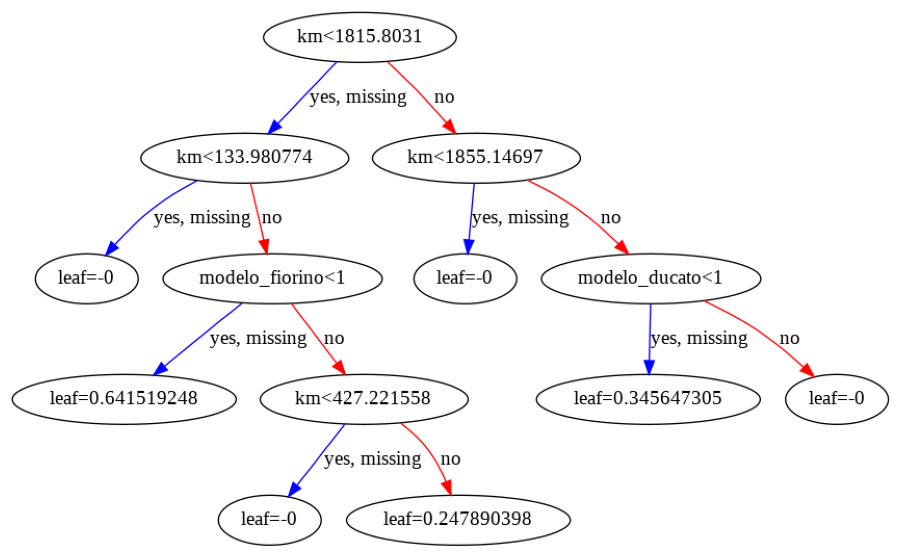

In [28]:
xgb.plot_tree(xg_reg,num_trees=5)
plt.rcParams['figure.figsize'] = [80, 30]
plt.show()

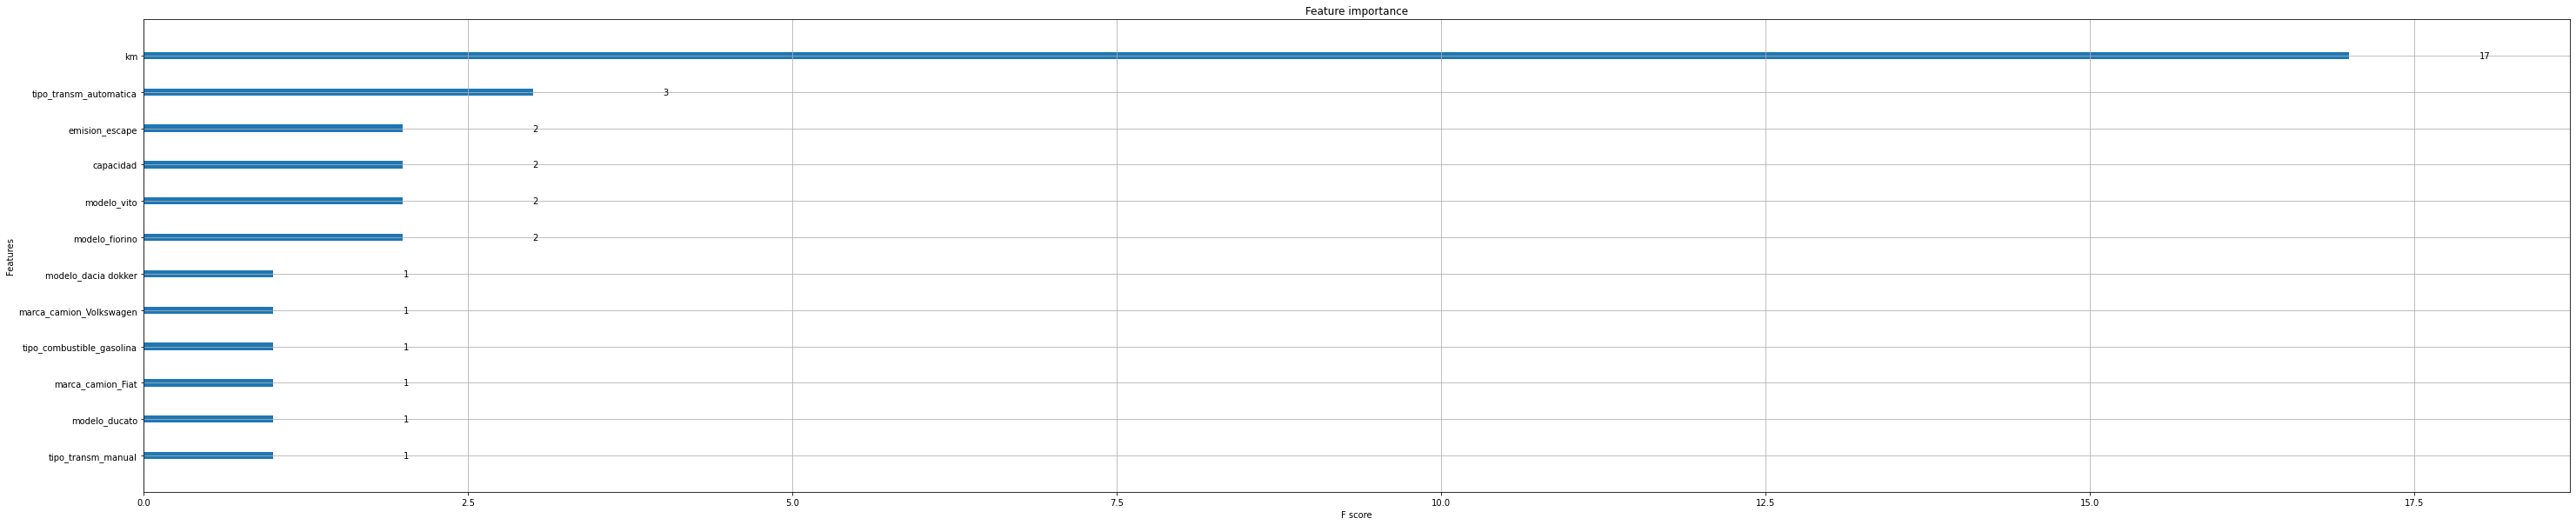

In [26]:
xgb.plot_importance(xg_reg)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()